In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import matplotlib.image as mpimg



In [100]:
ham_metadata = pd.read_csv('HAM10000_metadata_with_image_paths.csv')

In [101]:
ham_metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,HAM10000_images_part_1/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,HAM10000_images_part_1/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,HAM10000_images_part_1/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,HAM10000_images_part_1/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,HAM10000_images_part_1/ISIC_0032854.jpg


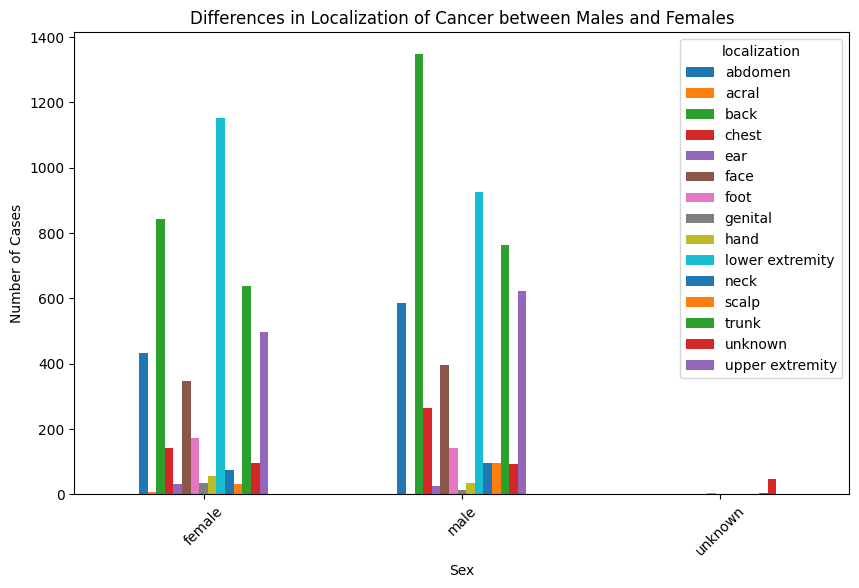

In [102]:
grouped_data = ham_metadata.groupby(['sex', 'localization'])['lesion_id'].count()


fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.unstack().plot(kind='bar', ax=ax)


ax.set_title('Differences in Localization of Cancer between Males and Females')
ax.set_xlabel('Sex')
ax.set_ylabel('Number of Cases')


plt.xticks(rotation=45)


plt.show()

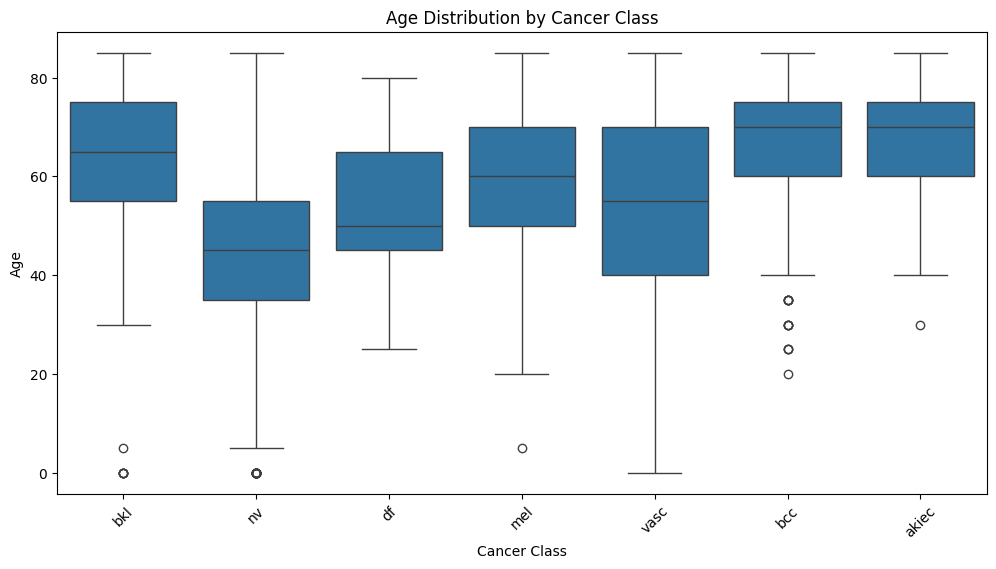

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ham_metadata, x='dx', y='age')
plt.title('Age Distribution by Cancer Class')
plt.xlabel('Cancer Class')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

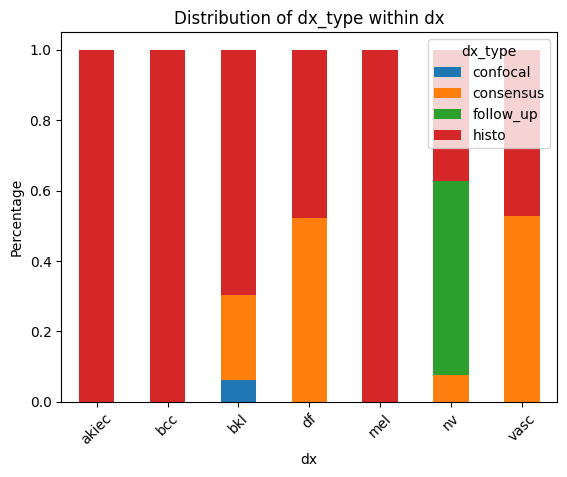

dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    327
bcc             0          0          0    514
bkl            69        264          0    766
df              0         60          0     55
mel             0          0          0   1113
nv              0        503       3704   2498
vasc            0         75          0     67


In [104]:

dx_crosstab = pd.crosstab(ham_metadata['dx'], ham_metadata['dx_type'])

dx_crosstab_pct = dx_crosstab.div(dx_crosstab.sum(axis=1), axis=0)

dx_crosstab_pct.plot(kind='bar', stacked=True)
plt.title('Distribution of dx_type within dx')
plt.xlabel('dx')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

print(dx_crosstab)


In [105]:


ham_metadata['image_path'] = 'HAM10000_images_part_1/' + ham_metadata['image_id'] + '.jpg'


ham_metadata.to_csv('~/Downloads/HAM10000_metadata_with_image_paths.csv', index=False)

In [106]:
# resize  images
directory = 'HAM10000_images_part_1/'

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):  

        image_path = os.path.join(directory, filename)

 
        img = Image.open(image_path)

        new_image = img.resize((100, 75))

      
        new_image.save(image_path)

     
        img.close()


In [107]:
# create dictionary with link to images and class

ham_metadata = pd.read_csv('HAM10000_metadata_with_image_paths.csv')

directory1 = 'HAM10000_images_part_1/'


image_cancer_type = {}


for filename in os.listdir(directory1):
    if filename.endswith('.jpg'):  
        image_id = filename.split('.')[0]
        matches = ham_metadata.loc[ham_metadata['image_id'] == image_id, 'dx'].values
        if len(matches) > 0:
            cancer_type = matches[0]
            image_cancer_type[filename] = cancer_type




In [108]:
# create a file with link to images and class
with open('image_cancer_types.txt', 'w') as file:
  
    for filename, cancer_type in image_cancer_type.items():
        file.write(f"Image: {filename}, Cancer Type: {cancer_type}\n")


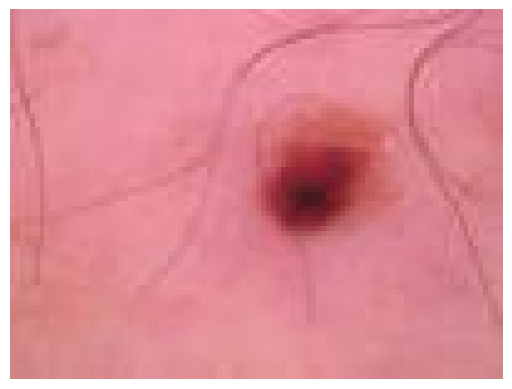

In [109]:


directory = 'HAM10000_images_part_1/'


filename = 'ISIC_0031587.jpg'  


image_path = os.path.join(directory, filename)
image = mpimg.imread(image_path)


plt.imshow(image)
plt.axis('off') 
plt.show()
